# CodSoft Internship Task 1 : Titanic Survival Prediction

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("Titanic-Dataset.csv") # Data Loading

# Data Analysis and Exploration

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

In [5]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22148\2819444481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22148\2819444481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
# Mapping or Preprocessing
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [8]:
df['FamilySize']=df['SibSp']+df['Parch']

# Data Visualization

 
0 (Skyblue) = Not Survived
 1 (Orange)= Survived


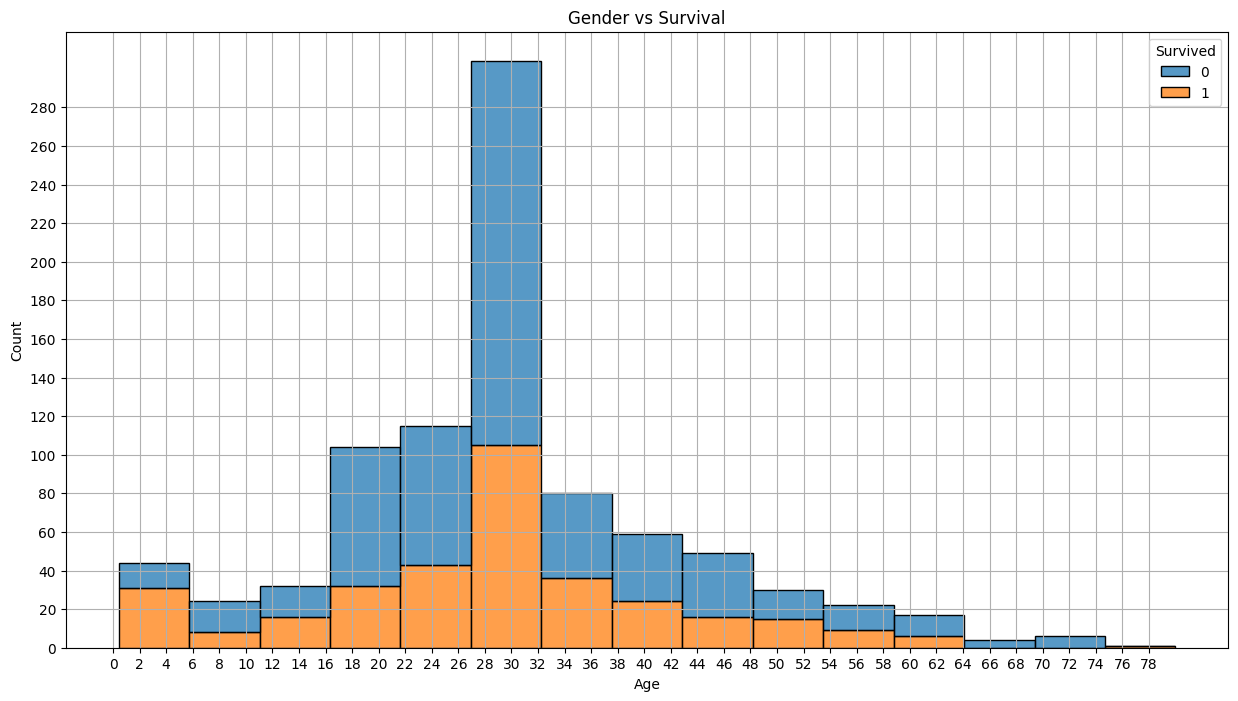

In [9]:
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='Age',hue='Survived',bins=15,multiple='stack')
plt.grid(True)
plt.xticks(np.arange(-0, 80,2)) 
plt.yticks(np.arange(-0, 300,20)) 
plt.title('Gender vs Survival')
print(' \n0 (Skyblue) = Not Survived\n 1 (Orange)= Survived')

Text(0.5, 1.0, 'Gender vs Survival')

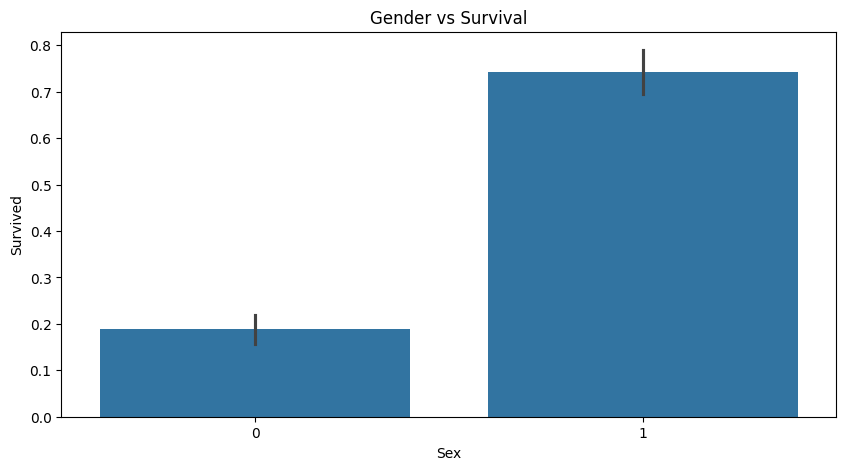

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Gender vs Survival')
# 0 = Male and 1 = Female

survived Male and Female
Sex
0    109
1    233
Name: Survived, dtype: int64

total Male and Female
Sex
0    577
1    314
Name: count, dtype: int64


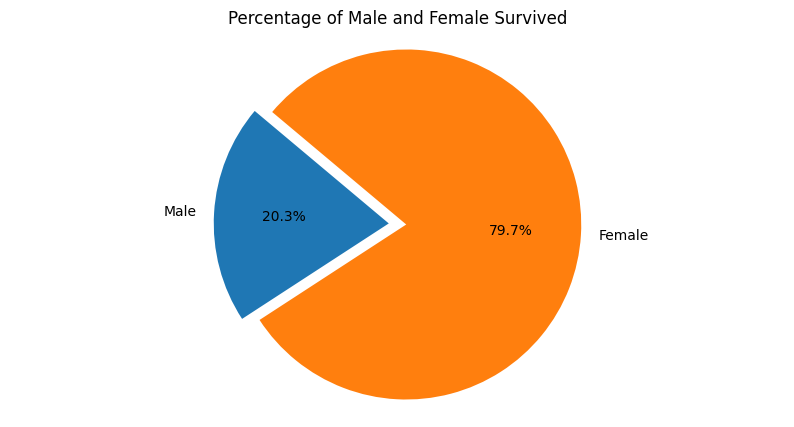

In [11]:
survival_counts = df.groupby('Sex')['Survived'].sum()
total_counts = df['Sex'].value_counts()
labels = survival_counts.index
sizes = [survival_counts[label] / total_counts[label] for label in labels]
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=('Male','Female'), autopct='%1.1f%%', startangle=140,explode=(0.1,0))
plt.title('Percentage of Male and Female Survived')
plt.axis('equal') 
print('survived Male and Female')
print(survival_counts)
print('\ntotal Male and Female')
print(total_counts)
# 0 = Male and 1 = Female

([<matplotlib.axis.XTick at 0x22aece80e30>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100'),
  Text(120, 0, '120'),
  Text(140, 0, '140'),
  Text(160, 0, '160'),
  Text(180, 0, '180'),
  Text(200, 0, '200'),
  Text(220, 0, '220'),
  Text(240, 0, '240'),
  Text(260, 0, '260'),
  Text(280, 0, '280'),
  Text(300, 0, '300'),
  Text(320, 0, '320'),
  Text(340, 0, '340'),
  Text(360, 0, '360'),
  Text(380, 0, '380'),
  Text(400, 0, '400'),
  Text(420, 0, '420'),
  Text(440, 0, '440'),
  Text(460, 0, '460'),
  Text(480, 0, '480'),
  Text(500, 0, '500'),
  Text(520, 0, '520'),
  Text(540, 0, '540'),
  Text(560, 0, '560'),
  Text(580, 0, '580')])

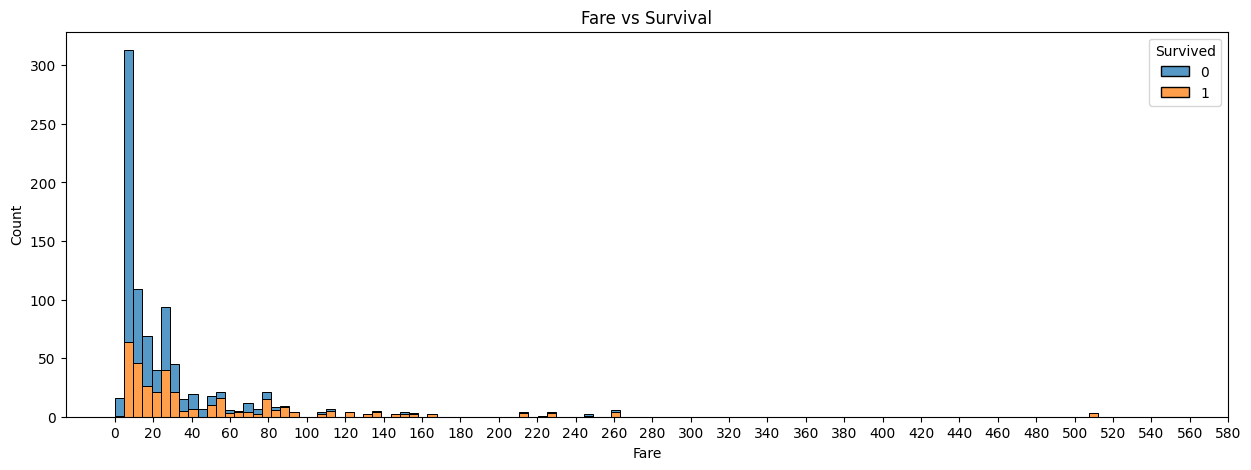

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=False)
plt.title('Fare vs Survival')
plt.xticks(np.arange(-0, 600, 20)) 

Text(0.5, 1.0, 'Embarked vs Survival')

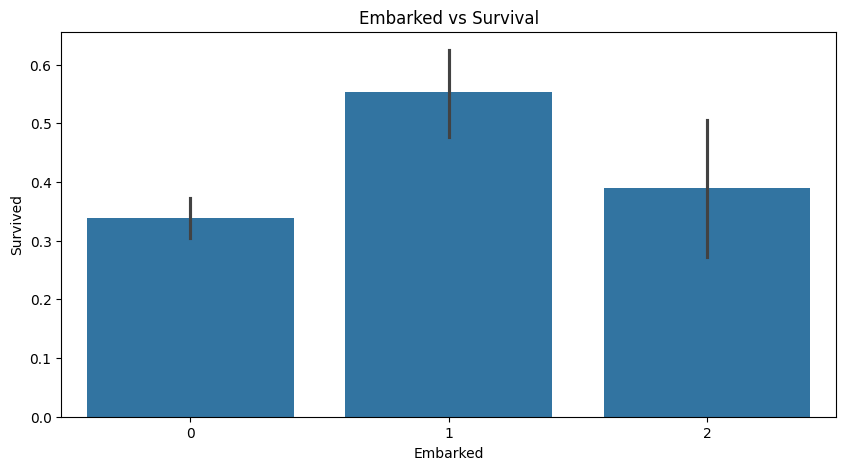

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Embarked vs Survival')

Text(0.5, 1.0, 'Family Size vs Survival')

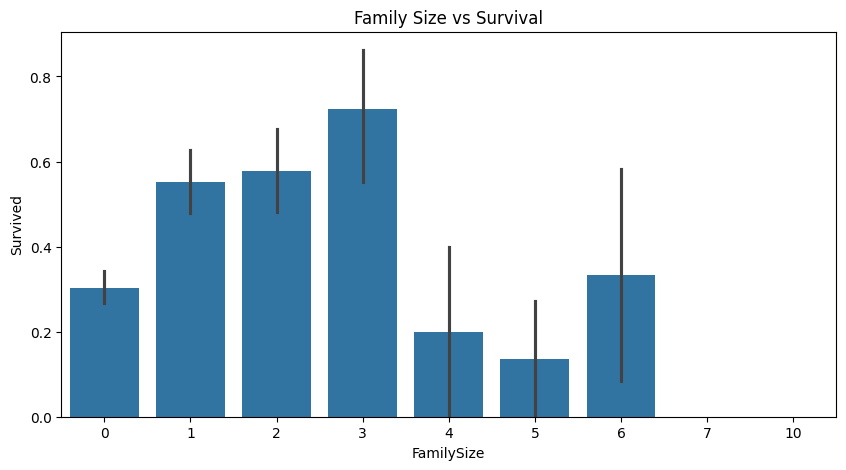

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Family Size vs Survival')

# Data Splitting

In [15]:
x=df.drop(columns=['PassengerId','Survived','Name','Ticket'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(x_test))

712
179


# Model training and Testing

In [16]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test)
model.score(x_test,y_test)
print(x_test)

     Pclass  Sex   Age  SibSp  Parch    Fare  Embarked  FamilySize
790       3    0  28.0      0      0   7.750         2           0
741       1    0  36.0      1      0  78.850         0           1
15        2    1  55.0      0      0  16.000         0           0
253       3    0  30.0      1      0  16.100         0           1
376       3    1  22.0      0      0   7.250         0           0
..      ...  ...   ...    ...    ...     ...       ...         ...
402       3    1  21.0      1      0   9.825         0           1
518       2    1  36.0      1      0  26.000         0           1
559       3    1  36.0      1      0  17.400         0           1
26        3    0  28.0      0      0   7.225         1           0
548       3    0  33.0      1      1  20.525         0           2

[179 rows x 8 columns]


# Predict New Passanger survived or not 

In [17]:
z=[[1,1,26,0,2,18,2,3]]
output=model.predict(z)
if output==1:
    print('passanger survived ')

passanger survived 


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
